In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in c:\users\potas\anaconda3\lib\site-packages (0.0)


In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [24]:
import pandas as pd
# from sklearn.ensemble import RandomForestClassifier

# Necessary for k nearest neighbors train test split (see Ins_K_Nearest_Neighbors)
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Necessary for scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder




# Read the CSV and Perform Basic Data Cleaning

In [5]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head(100)

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,CONFIRMED,0,0,0,0,8.103633,2.030000e-05,-2.030000e-05,176.948600,0.002050,...,-146,4.574,0.054,-0.041,0.732,0.062,-0.068,283.22141,40.421829,15.289
96,CONFIRMED,0,0,0,0,4.715108,1.940000e-05,-1.940000e-05,134.961780,0.003240,...,-146,4.574,0.054,-0.041,0.732,0.062,-0.068,283.22141,40.421829,15.289
97,CONFIRMED,0,0,0,0,6.365840,8.060000e-06,-8.060000e-06,171.135750,0.001000,...,-155,4.554,0.042,-0.168,0.849,0.212,-0.071,291.14951,40.420521,15.090
98,CONFIRMED,0,0,0,0,3.040330,3.370000e-07,-3.370000e-07,169.949011,0.000089,...,-151,4.519,0.084,-0.063,0.791,0.071,-0.087,299.31610,40.822380,15.028


# Select your features (columns)

In [7]:
# Set features. This will also be used as your x values.

# All false positive flags removed, because they are accounted for in koi_disposition.
selected_features = df[['koi_period', 'koi_period_err1', 'koi_period_err2']]
selected_features.head()

,koi_period,koi_period_err1,koi_period_err2
0,54.418383,2.479000e-04,-2.479000e-04
1,19.899140,1.490000e-05,-1.490000e-05
2,1.736952,2.630000e-07,-2.630000e-07
3,2.525592,3.760000e-06,-3.760000e-06
4,4.134435,1.050000e-05,-1.050000e-05


# Create a Train Test Split

Use `koi_disposition` for the y values

In [8]:
y = df['koi_disposition']
y.head()

0         CONFIRMED
1    FALSE POSITIVE
2    FALSE POSITIVE
3         CONFIRMED
4         CONFIRMED
Name: koi_disposition, dtype: object

In [12]:
X_train, X_test, y_train, y_test = train_test_split(selected_features, y, random_state=42)
X_train.head()

,koi_period,koi_period_err1,koi_period_err2
6122,6.768901,7.380000e-05,-7.380000e-05
6370,0.733726,6.060000e-06,-6.060000e-06
2879,7.652707,6.540000e-05,-6.540000e-05
107,7.953547,1.910000e-05,-1.910000e-05
29,4.959319,5.150000e-07,-5.150000e-07


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [22]:
# Scale your data

# Inspired by MinMax under /supplemental in Ins_Data_Preprocessing
X_minmax = MinMaxScaler().fit(X_train)

X_train_minmax = X_minmax.transform(X_train)
X_test_minmax = X_minmax.transform(X_test)

#Inspired by Label_Encoding in /supplemental in Ins_Data_Preprocessing
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
label_encoder.classes_

array(['CANDIDATE', 'CONFIRMED', 'FALSE POSITIVE'], dtype=object)

In [23]:
y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)

# Train the Model



k: 1, Train/Test Score: 1.000/0.529
k: 3, Train/Test Score: 0.749/0.546
k: 5, Train/Test Score: 0.700/0.578
k: 7, Train/Test Score: 0.692/0.574
k: 9, Train/Test Score: 0.683/0.580
k: 11, Train/Test Score: 0.670/0.583
k: 13, Train/Test Score: 0.663/0.585
k: 15, Train/Test Score: 0.658/0.581
k: 17, Train/Test Score: 0.650/0.582
k: 19, Train/Test Score: 0.647/0.581


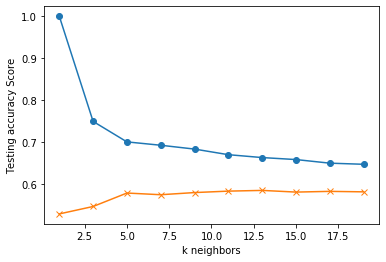

In [26]:
# This cell adapted from lesson Ins_K_Nearest_Neighbors

# Quote from the lesson on k nearest neighbors:
## Loop through different k values to see which has the highest accuracy
## Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_minmax, y_train)
    train_score = knn.score(X_train_minmax, y_train)
    test_score = knn.score(X_test_minmax, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

# print(f"Training Data Score: {model2.score(X_train_scaled, y_train)}")
# print(f"Testing Data Score: {model2.score(X_test_scaled, y_test)}")

# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [ ]:
# Create the GridSearchCV model

In [ ]:
# Train the model with GridSearch

In [ ]:
print(grid2.best_params_)
print(grid2.best_score_)

# Save the Model

In [ ]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'your_name.sav'
joblib.dump(your_model, filename)